In [155]:
import pandas as pd, numpy as np, seaborn as sns
from matplotlib import pyplot as plt

In [156]:
fdata = pd.read_csv('flower.csv',sep="\t")

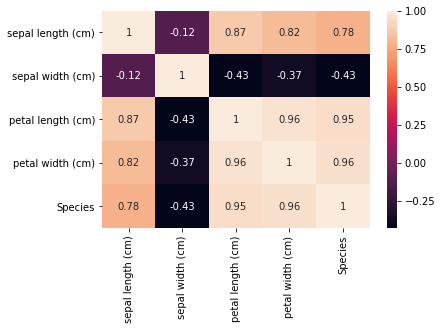

In [157]:
sns.heatmap(fdata.corr(),annot=True)
plt.show()

In [158]:
x=fdata.drop(columns='Species')
y=fdata.Species

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
fModel = DecisionTreeClassifier()

In [162]:
fModel.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
fModel.score(x_train,y_train)

1.0

In [164]:
fModel.score(x_test,y_test)

0.9736842105263158

In [165]:
from sklearn.tree import export_graphviz

In [166]:
export_graphviz(fModel,out_file="tree1.dot",rounded=True,feature_names=x_train.columns,filled=True)

In [167]:
gdata = pd.read_csv('goldfund.csv',sep=',')

In [168]:
x=gdata.drop(columns=['Gold_Fund','ID'])
y=gdata.Gold_Fund

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [170]:
gModel = DecisionTreeClassifier(min_samples_split=16, min_samples_leaf=6,max_depth=7)

In [171]:
gModel.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
gModel.score(x_train,y_train)

0.934351145038168

In [173]:
gModel.score(x_test,y_test)

0.8721461187214612

In [174]:
export_graphviz(gModel,out_file="goldfundtree.dot",rounded=True,feature_names=x_train.columns,filled=True)

In [175]:
gtestdata =  pd.read_clipboard(sep=',')

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rfmodel = RandomForestClassifier(n_estimators=200,max_features=15,min_samples_split=16, min_samples_leaf=4,max_depth=3)

In [178]:
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
rfmodel.score(x_train,y_train)

0.9251908396946565

In [180]:
rfmodel.score(x_test,y_test)

0.908675799086758

In [181]:
rfmodel.feature_importances_

array([0.03227608, 0.06595051, 0.10375355, 0.26087353, 0.03931334,
       0.01476332, 0.00698312, 0.01116786, 0.00575126, 0.00865354,
       0.10002103, 0.33938427, 0.00162661, 0.00298448, 0.00649751])

In [182]:
x_train.columns

Index(['Gender', 'AMB', 'AccountSince', 'RelationshipSize', 'AvgMonthlyTxn',
       'DematAccounts', 'FD_Nos', 'MF_nos', 'Equity_mfs', 'Debt_mfs',
       'Balanced_Funds', 'ELSS', 'PMS_accounts', 'Trading_Accounts',
       'Speciality_funds'],
      dtype='object')

In [183]:
edata = pd.read_csv('eresign.csv',sep="\t")

In [184]:
edata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [185]:
x = edata[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]

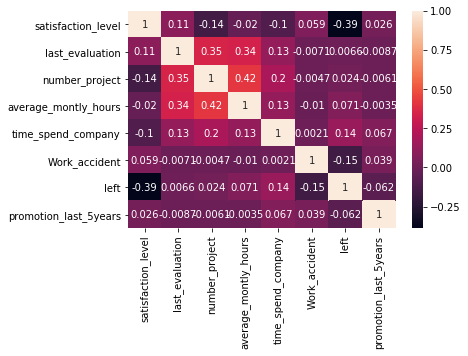

In [186]:
sns.heatmap(edata.corr(),annot=True)

In [187]:
x_dumm = pd.get_dummies(data=edata, columns=['dept','salary'],drop_first=True)
y = edata[['left']]

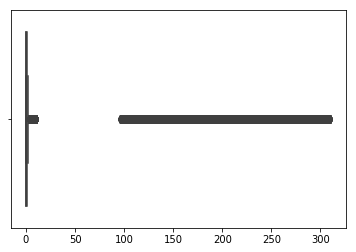

In [188]:
sns.boxplot(x_dumm)

In [189]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x_dumm,y)

In [191]:
stdScaler = StandardScaler()

In [192]:
stdScaler.fit(x_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [193]:
x_train_std = stdScaler.transform(x_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [194]:
x_test_std = stdScaler.transform(x_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [195]:
ldata = pd.read_csv('loan.csv',sep="\t")

In [196]:
ldata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


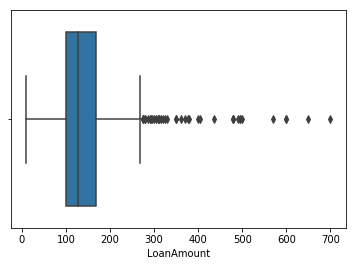

In [197]:
sns.boxplot(ldata.LoanAmount.dropna())

In [198]:
parameter_model = {'min_samples_split':[5,7,9],'max_depth':[8,10,11]}

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
rfm=RandomForestClassifier(n_estimators=1000)

In [201]:
gridModel = GridSearchCV(estimator=rfm,param_grid=parameter_model,cv=2)

In [204]:
gridModel.best_score_

1.0

In [205]:
gridModel.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [209]:
x=fdata[['sepal length (cm)','petal length (cm)']]
y=fdata.Species

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [212]:
from sklearn.svm import SVC as svc

In [213]:
svmodel =svc()

In [215]:
svmodel.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [216]:
svmodel.score(x_train,y_train)

0.9553571428571429

In [217]:
svmodel.score(x_test,y_test)

0.9736842105263158

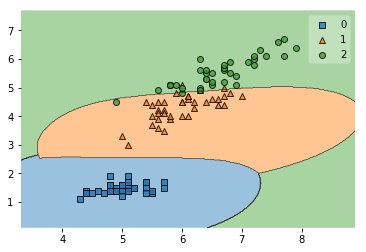

In [218]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train.values,y_train.values,clf=svmodel)

In [237]:
x=x=fdata.drop(columns='Species')
y=fdata.Species
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [238]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
knModel = KNeighborsClassifier()
knModel.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [240]:
knModel.score(x_train,y_train)

0.9553571428571429

In [241]:
knModel.score(x_test,y_test)

0.9736842105263158

In [247]:
train_score=[]
test_score=[]
for i in range(1,20):
    knnModel= KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(x_train, y_train)
    train_score.append(knnModel.score(x_train,y_train))
    test_score.append(knnModel.score(x_test,y_test))


In [248]:
from matplotlib import style

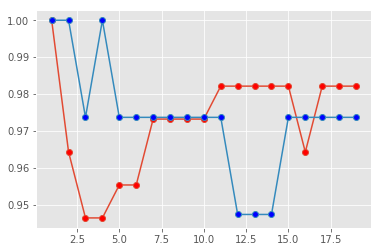

In [249]:
style.use('ggplot')
plt.plot(range(1,20),train_score,label="train",marker="o",markerfacecolor="red")
plt.plot(range(1,20),test_score,label="test",marker="o",markerfacecolor="blue")

In [250]:
pdata=pd.read_csv('market.csv',sep="\t")

In [252]:
pdata.columns

Index(['Symbol', 'Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA',
       'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin'],
      dtype='object')

In [253]:
x=pdata.iloc[0:,1:]

In [254]:
x.columns

Index(['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover',
       'Leverage', 'Rev_Growth', 'Net_Profit_Margin'],
      dtype='object')

In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
stdScaler= StandardScaler()

In [257]:
stdScaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [258]:
x_std=stdScaler.transform(x)

In [261]:
from sklearn.cluster import KMeans

In [262]:
clModel = KMeans(n_clusters=3)

In [264]:
clModel.fit(x_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [265]:
clModel.labels_

array([0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0],
      dtype=int32)

In [267]:
pdata['clusterNumber']=clModel.labels_

In [268]:
clModel.inertia_

102.18478633940522

In [270]:
pdata.sort_values('clusterNumber',inplace=True)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


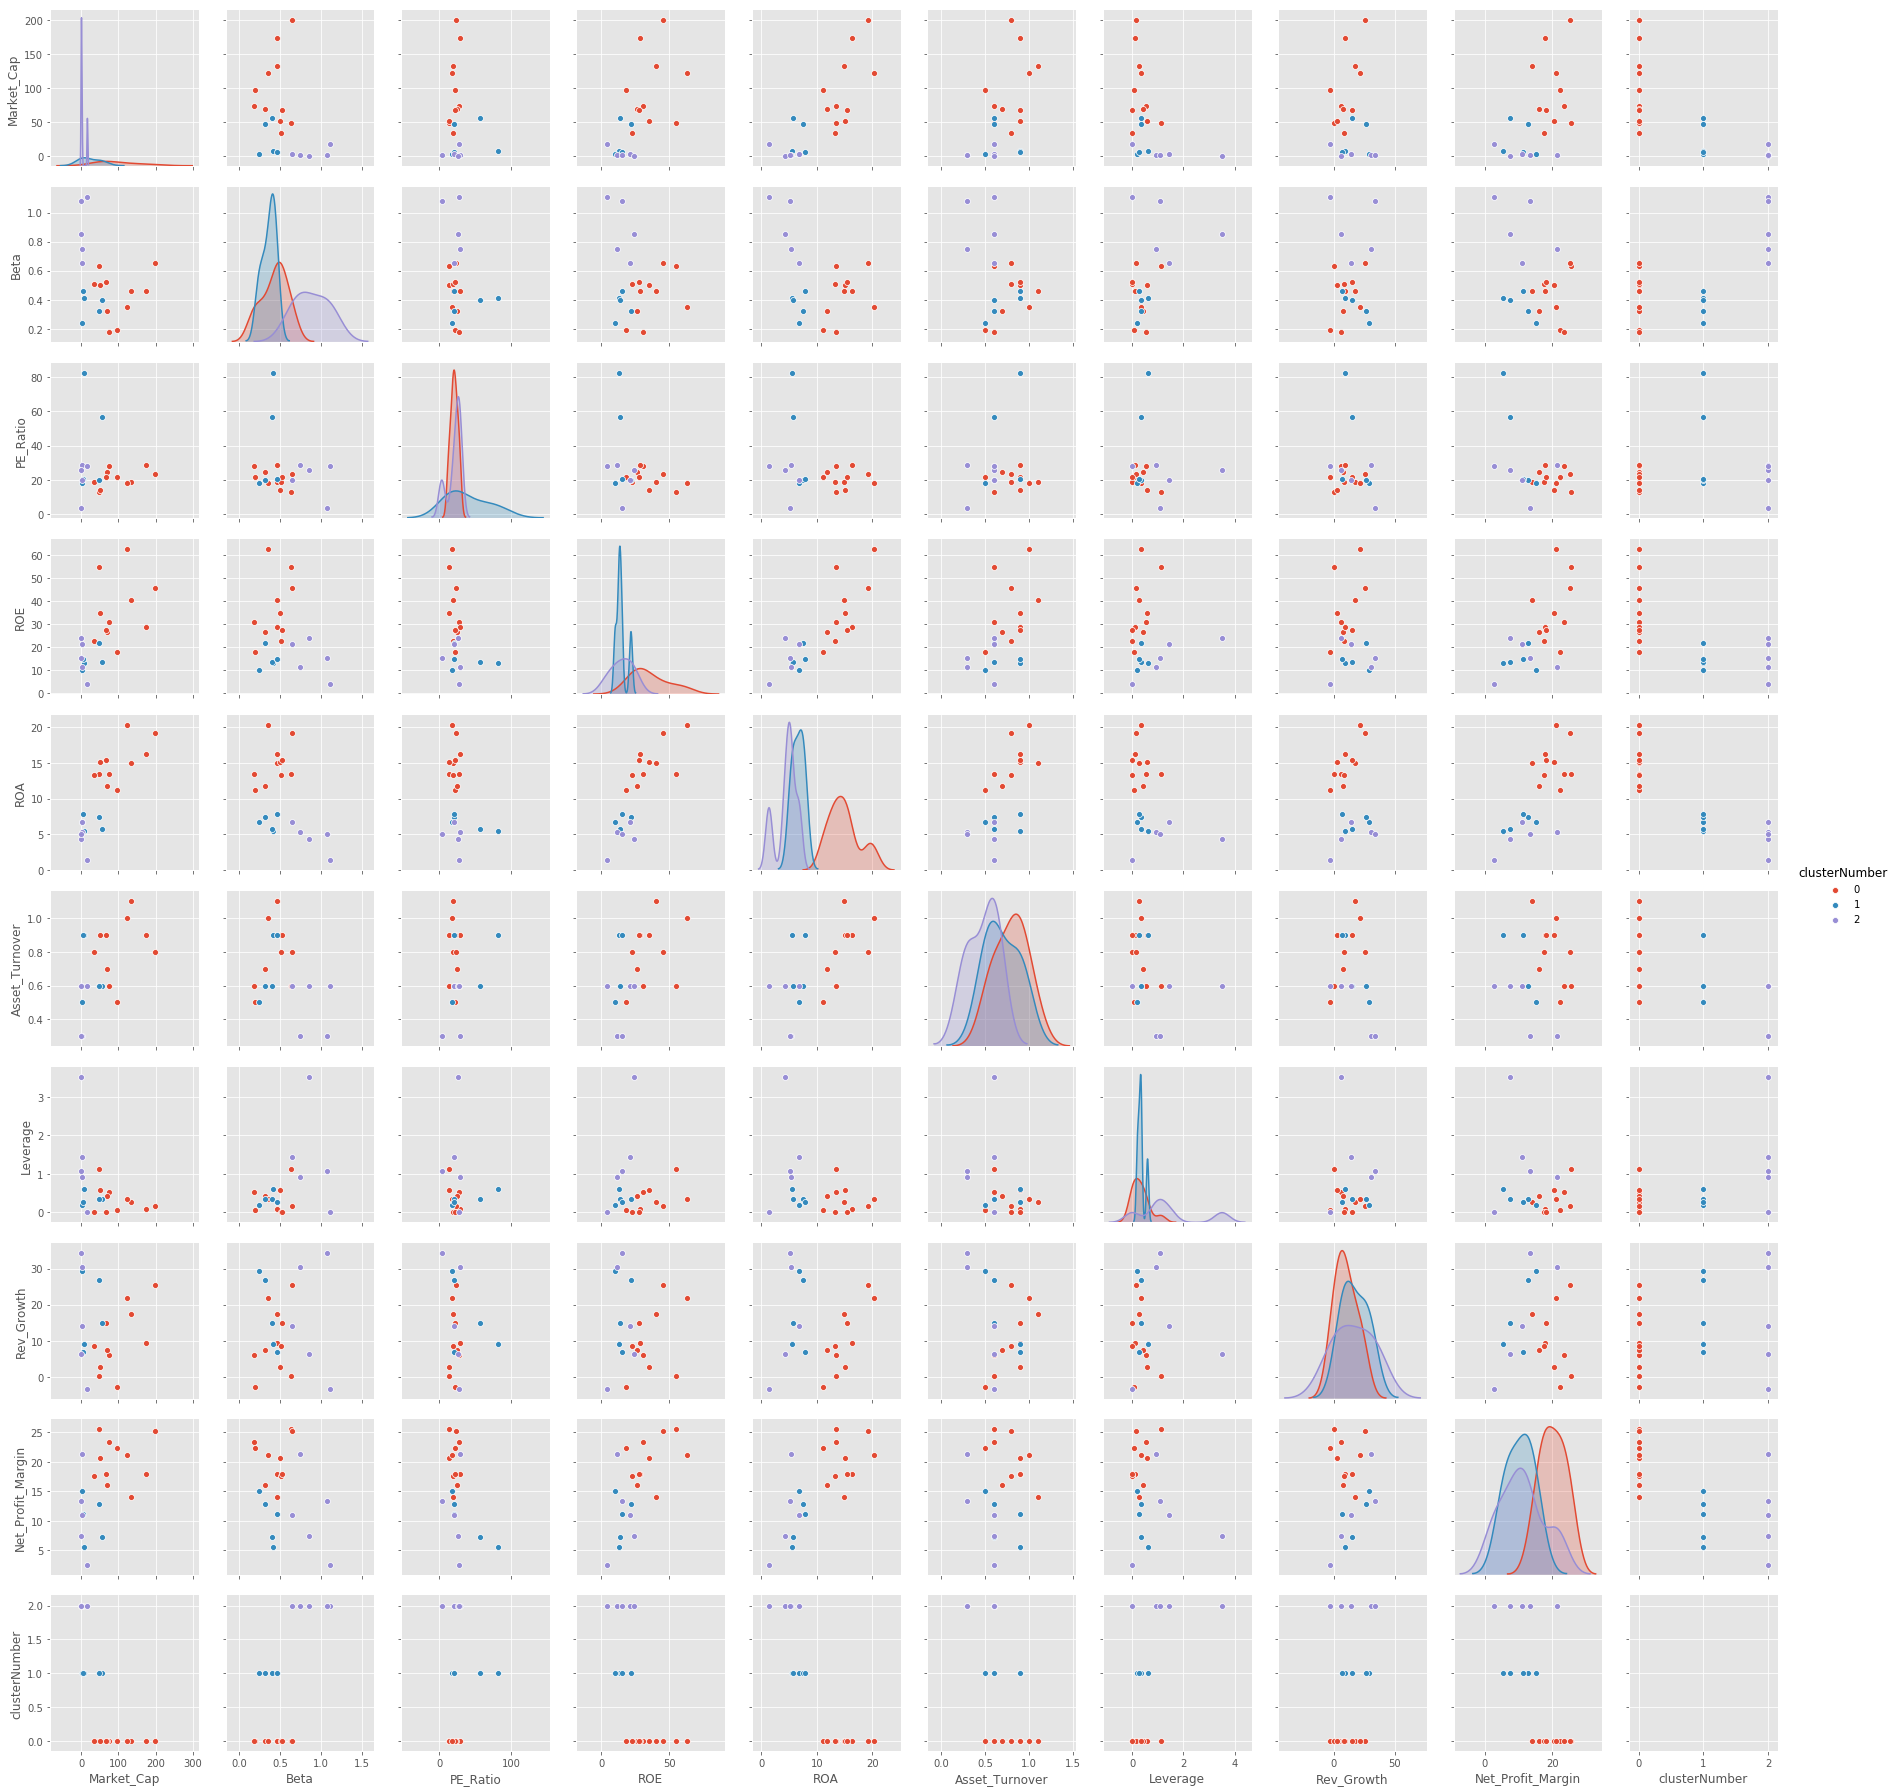

In [272]:
sns.pairplot(data=pdata.drop(columns='Symbol'),hue='clusterNumber')

In [278]:
var=[]
for i in range(1,22):
    clModel= KMeans(n_clusters=i)
    clModel.fit(x_train, y_train)
    var.append(clModel.inertia_)

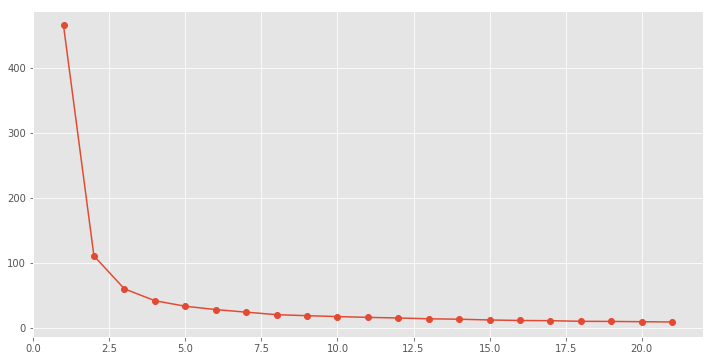

In [280]:
plt.figure(figsize=(12,6))
plt.plot(range(1,22),var,marker="o")
plt.show()